## 1. Problem Statement
The main goal of this project is to predict whether the student will be recruited in campus placements or not based on the available factors in the dataset such as gender, ssc_p, hsc_p, mba_p etc.

## 2. Data Collection
- Data source :- https://www.kaggle.com/c/ml-with-python-course-project/data
- This data consist of 215 rows × 15 columns.

# 2.1 Import liabrary and dataset

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn 

In [12]:
df=pd.read_excel("C:/Users/dell/Documents/train campus.xlsx")

In [13]:
df['gender'].replace({0:"M", 1:"F"},inplace=True)

In [14]:
df

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,212,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,213,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,214,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0


In [15]:
df=df.drop(['sl_no',"salary"], axis =1)

In [16]:
df

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed
...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed
211,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed
212,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed
213,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed


## Data information

- specializationsl_no :- serial number
- Gender:- gender identification M or F
- ssc_p:- SSC percentage
- ssc_b:- information about SSC board i.e. central board or state board. State board is with respect to a particular state.
- hsc_p:- HSC percentage
- hsc_b:- information about HSC board i.e. central board or state board. State board is with respect to a particular state.
- hsc_s:- which branch completed the HSC? Commerce, science, and art
- degree_p:- Degree percentage
- degree_t:- which branch completed the degree? sci&tech and comm&mgmt
- workex:- any work experience ‘YES’ or ‘NO’
- etest_p:- test percentage
- specialisation:- branch specialization i.e. Mkt&HR, Mky&Fin
- mba_p:- MBA percentage
- Status:- About placement, he/she placed or not placed

## 3. Chech data to perform

In [17]:
df.isna().sum()

gender            0
ssc_p             0
ssc_b             0
hsc_p             0
hsc_b             0
hsc_s             0
degree_p          0
degree_t          0
workex            0
etest_p           0
specialisation    0
mba_p             0
status            0
dtype: int64

In [18]:
df.duplicated().sum()

0

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          215 non-null    object 
 1   ssc_p           215 non-null    float64
 2   ssc_b           215 non-null    object 
 3   hsc_p           215 non-null    float64
 4   hsc_b           215 non-null    object 
 5   hsc_s           215 non-null    object 
 6   degree_p        215 non-null    float64
 7   degree_t        215 non-null    object 
 8   workex          215 non-null    object 
 9   etest_p         215 non-null    float64
 10  specialisation  215 non-null    object 
 11  mba_p           215 non-null    float64
 12  status          215 non-null    object 
dtypes: float64(5), object(8)
memory usage: 22.0+ KB


## Statistics of the data

In [20]:
df.describe()

,ssc_p,hsc_p,degree_p,etest_p,mba_p
count,215.000000,215.000000,215.000000,215.000000,215.000000
mean,67.303395,66.333163,66.370186,72.100558,62.278186
std,10.827205,10.897509,7.358743,13.275956,5.833385
min,40.890000,37.000000,50.000000,50.000000,51.210000
25%,60.600000,60.900000,61.000000,60.000000,57.945000
50%,67.000000,65.000000,66.000000,71.000000,62.000000
75%,75.700000,73.000000,72.000000,83.500000,66.255000
max,89.400000,97.700000,91.000000,98.000000,77.890000


## Explore data with visualisation

#### Now we study effect of each feature with status

## 1. Gender

##### Does gender affect status?

M    139
F     76
Name: gender, dtype: int64


<function matplotlib.pyplot.show(close=None, block=None)>

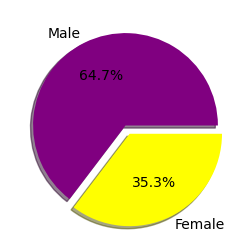

In [21]:
plt.figure(figsize=(6,3))

a=df.gender.value_counts()
print(a)

plt.pie(x=df['gender'].value_counts(),labels=['Male','Female'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['purple','yellow'])
plt.show

M    139
F     76
Name: gender, dtype: int64


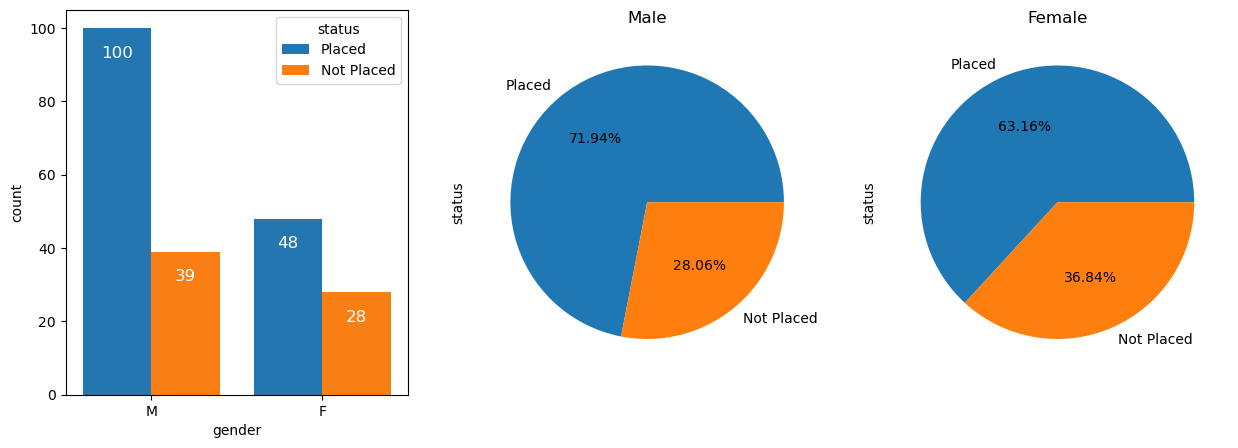

In [10]:
g=df.gender.value_counts()
print(g)

plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
ax=sns.countplot(x="gender", hue="status", data=df,saturation=0.95)

for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='white', size=12)



plt.subplot(1,3,2)
df.query('gender == "M"')['status'].value_counts().plot(kind = 'pie', autopct = '%.2f%%', title = 'Male')

plt.subplot(1,3,3)
df.query('gender == "F"')['status'].value_counts().plot(kind = 'pie', autopct = '%.2f%%', title = 'Female')


plt.show()

### Insights
- We have 215 students, out of which 139 are male and 76 are female.
- Out of 139 male 100 are placed and out of 76 female 48 are placed.
- Comparetively male placed more as compare to female.
- Gender affects status.

## 2. ssc_p

##### Does ssc_p affect status?

C:\Users\dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


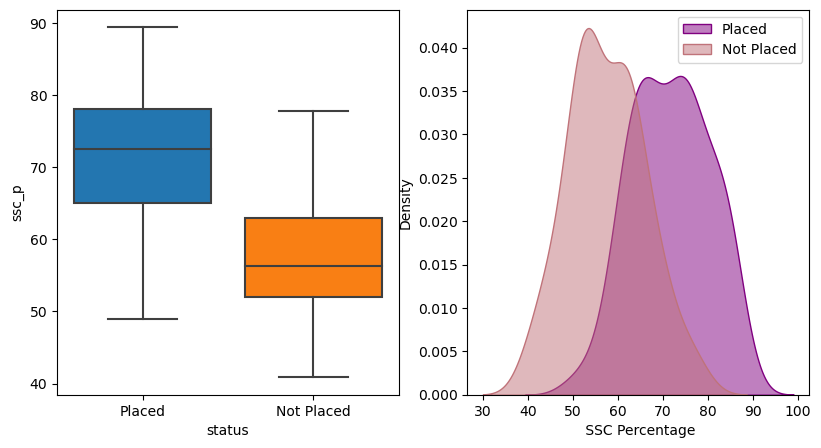

In [11]:
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
sns.boxplot("status","ssc_p",data=df,saturation=0.95)

plt.subplot(1,3,2)
sns.kdeplot(df.ssc_p[ df.status=="Placed"],shade=True,color='purple',alpha=0.5)
sns.kdeplot(df.ssc_p[ df.status=="Not Placed"],shade=True,color='xkcd:dusty rose',alpha=0.5)
plt.legend(["Placed", "Not Placed"])
plt.xlabel(" SSC Percentage")
plt.show()

### Insights
- Students who has more than 70 percentage in Secondary Education are getting placed.
-students who has 50 or less than 50 are not placed.
- ssc_p affects the status

## 3. ssc_b

##### Does ssc_b affect status?

Central    116
Others      99
Name: ssc_b, dtype: int64


<function matplotlib.pyplot.show(close=None, block=None)>

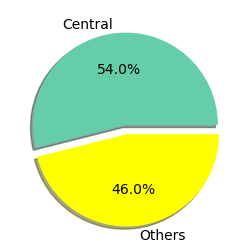

In [12]:
plt.figure(figsize=(6,3))

a=df.ssc_b.value_counts()
print(a)

plt.pie(x=df['ssc_b'].value_counts(),labels=['Central','Others'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['mediumaquamarine','yellow'])
plt.show

Central    116
Others      99
Name: ssc_b, dtype: int64


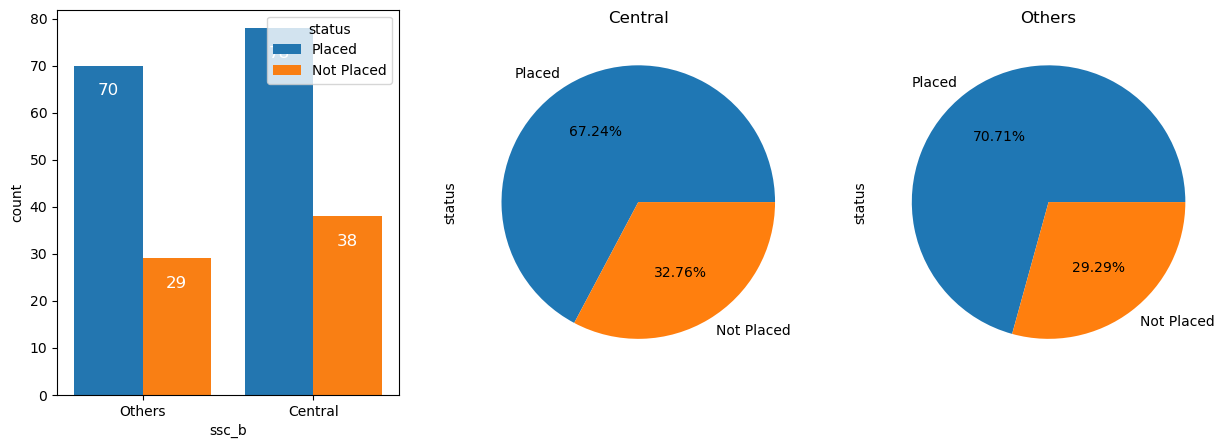

In [13]:
g=df.ssc_b.value_counts()
print(g)

plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
ax=sns.countplot(x="ssc_b", hue="status", data=df,saturation=0.95)

for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='white', size=12)



plt.subplot(1,3,2)
df.query('ssc_b == "Central"')['status'].value_counts().plot(kind = 'pie', autopct = '%.2f%%', title = 'Central')

plt.subplot(1,3,3)
df.query('ssc_b == "Others"')['status'].value_counts().plot(kind = 'pie', autopct = '%.2f%%', title = 'Others')


plt.show()




### Insights
- Here, 116 students are from central board and 99 from others board.
- Out of 116 students 78 are placed and out of 99 students 70 are placed.
- Education board does not affect status.

## 4.hsc_p

##### Does hsc_p affect status?

C:\Users\dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


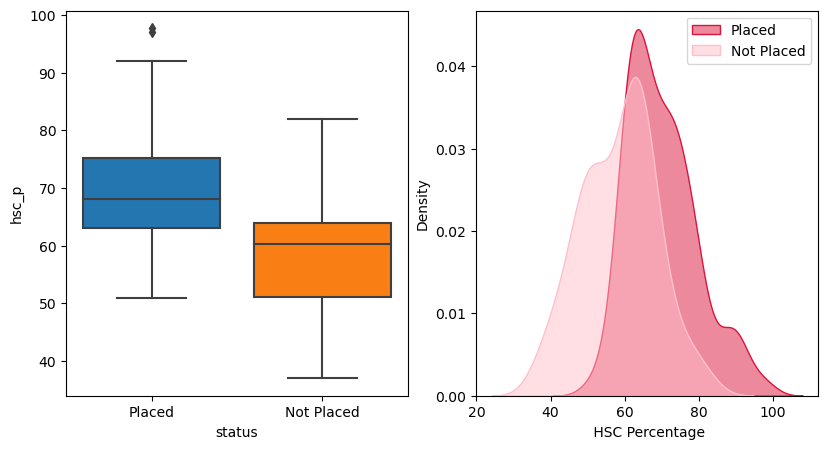

In [14]:
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
sns.boxplot("status","hsc_p",data=df,saturation=0.95)

plt.subplot(1,3,2)
sns.kdeplot(df.hsc_p[ df.status=="Placed"],shade=True,color='crimson',alpha=0.5)
sns.kdeplot(df.hsc_p[ df.status=="Not Placed"],shade=True,color='pink',alpha=0.5)
plt.legend(["Placed", "Not Placed"])
plt.xlabel(" HSC Percentage")
plt.show()

### Insights
- Students who has above 60% are getting placed
- For placement students required more than 60%.

## 5. hsc_b

##### Does hsc_b affect status?

Others     131
Central     84
Name: hsc_b, dtype: int64


<function matplotlib.pyplot.show(close=None, block=None)>

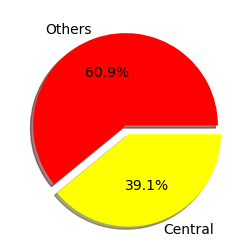

In [17]:
plt.figure(figsize=(6,3))

a=df.hsc_b.value_counts()
print(a)

plt.pie(x=df['hsc_b'].value_counts(),labels=['Others','Central'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['red','yellow'])
plt.show

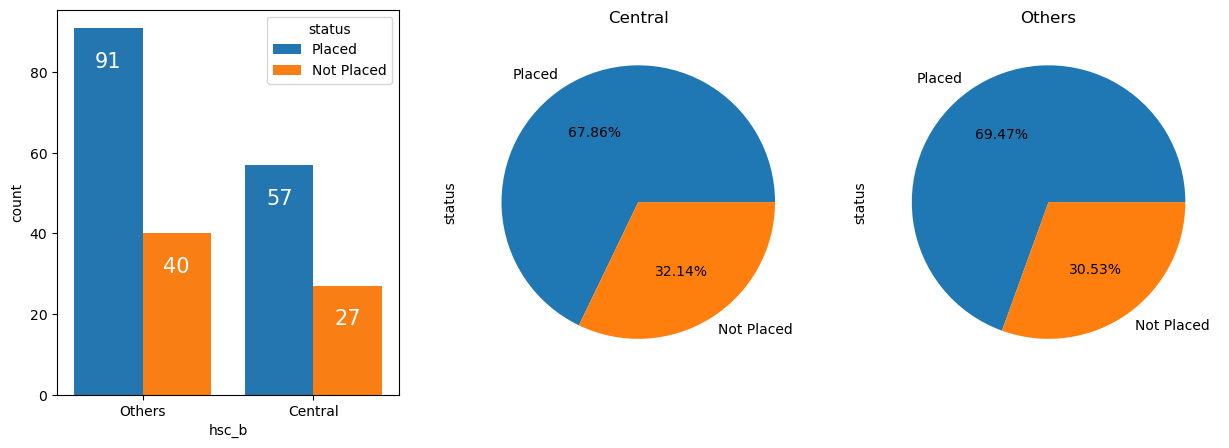

In [28]:
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
az=sns.countplot(x="hsc_b",hue="status", data=df,saturation=0.95)


for p in az.patches:
    az.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='white', size=15)

plt.subplot(1,3,2)
df.query('hsc_b == "Central"')['status'].value_counts().plot(kind = 'pie', autopct = '%.2f%%', title = 'Central')

plt.subplot(1,3,3)
df.query('hsc_b == "Others"')['status'].value_counts().plot(kind = 'pie', autopct = '%.2f%%', title = 'Others')


plt.show()

### Insights
- Here, 131 students are from others board and 84 are from central board.
- Out of 131, 91 (67.86% )are placed and out of 84, 57(69.47%) are placed.
- Education board does not affects status.

## 6. hsc_s

##### Does hsc_s affect status?

Commerce    113
Science      91
Arts         11
Name: hsc_s, dtype: int64


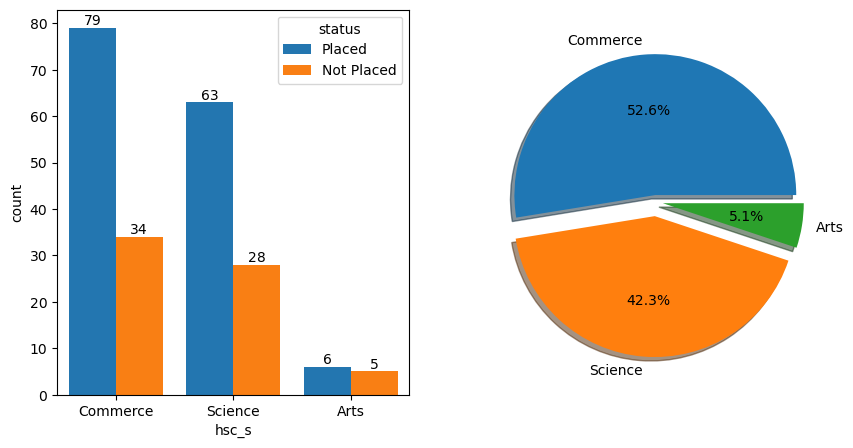

In [27]:
x=df.hsc_s.value_counts()
print(x)

f,ax=plt.subplots(1,2,figsize=(10,5))
sns.countplot(x=df['hsc_s'],hue="status",data=df,ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=10)
    
    
    
plt.pie(x=df['hsc_s'].value_counts(),labels=['Commerce','Science',"Arts"],explode=[0.05,0.1,0.05],autopct='%1.1f%%',shadow=True)
plt.show()

### Insights
- Here, we have 3 subjects, Commerce, Science and Arts.
- In commerce out of 113, 79 are placed.
- In Science out of 91, 63 are placed.
- In Arts out of 11, 6 are placed.

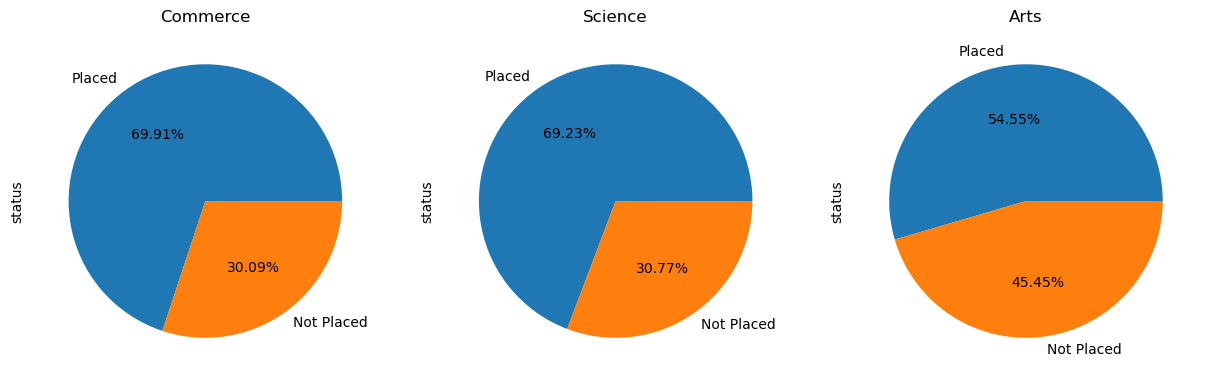

In [28]:
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
df.query('hsc_s == "Commerce"')['status'].value_counts().plot(kind = 'pie', autopct = '%.2f%%', title = 'Commerce')

plt.subplot(1,3,2)
df.query('hsc_s == "Science"')['status'].value_counts().plot(kind = 'pie', autopct = '%.2f%%', title = 'Science')

plt.subplot(1,3,3)
df.query('hsc_s == "Arts"')['status'].value_counts().plot(kind = 'pie', autopct = '%.2f%%', title = 'Arts')

plt.show()

### Insights
- Commerceand Science students are more placed.
- Arts students are less.

## 7. degree_p

##### Does degree_p affect status?

C:\Users\dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


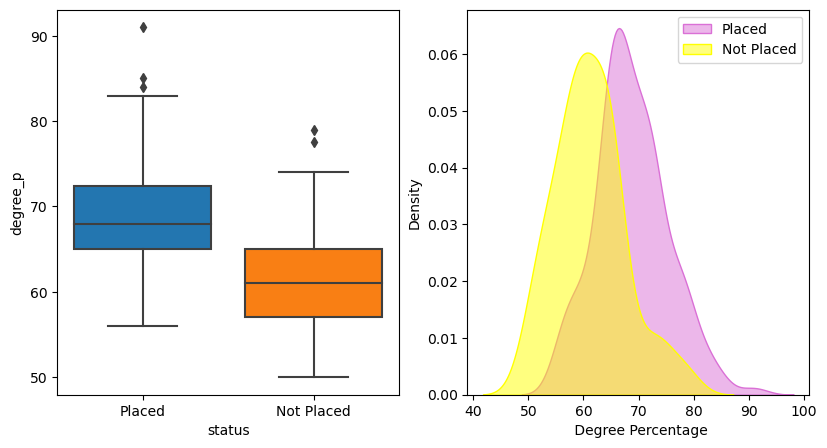

In [30]:
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
sns.boxplot("status","degree_p",data=df,saturation=0.95)

plt.subplot(1,3,2)
sns.kdeplot(df.degree_p[ df.status=="Placed"],shade=True,color='orchid',alpha=0.5)
sns.kdeplot(df.degree_p[ df.status=="Not Placed"],shade=True,color='yellow',alpha=0.5)
plt.legend(["Placed", "Not Placed"])
plt.xlabel(" Degree Percentage")
plt.show()

### Insights
- Here are some outliers, who have not placed after getting above 80%.
- For placement, atleast 50% is required.
- Students who have 65% and above 65% are placed.

## 8. degree_t

##### Does degree_t affect status?

Comm&Mgmt    145
Sci&Tech      59
Others        11
Name: degree_t, dtype: int64


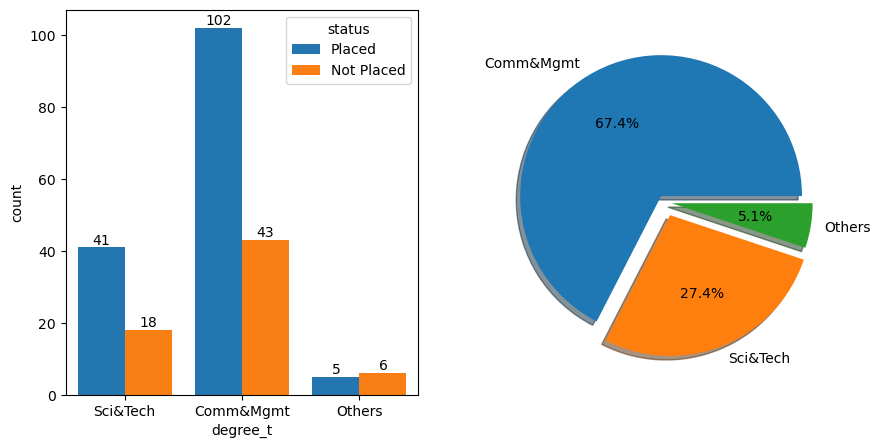

In [31]:
t=df.degree_t.value_counts()
print(t)

f,ax=plt.subplots(1,2,figsize=(10,5))
sns.countplot(x=df['degree_t'],hue="status",data=df,ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=10)
    
    
    
plt.pie(x=df['degree_t'].value_counts(),labels=['Comm&Mgmt','Sci&Tech',"Others"],explode=[0.05,0.1,0.05],autopct='%1.1f%%',shadow=True)
plt.show()

#### Insights
- For both Si&Tech and Comm&Mgmt, the ratio of placed to not placed is 2:1

## 9. workex

##### Does work experience affect status?

No     141
Yes     74
Name: workex, dtype: int64


<function matplotlib.pyplot.show(close=None, block=None)>

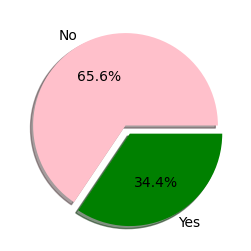

In [27]:
plt.figure(figsize=(6,3))

a=df.workex.value_counts()
print(a)

plt.pie(x=df['workex'].value_counts(),labels=['No','Yes '],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['pink','green'])
plt.show

No     141
Yes     74
Name: workex, dtype: int64


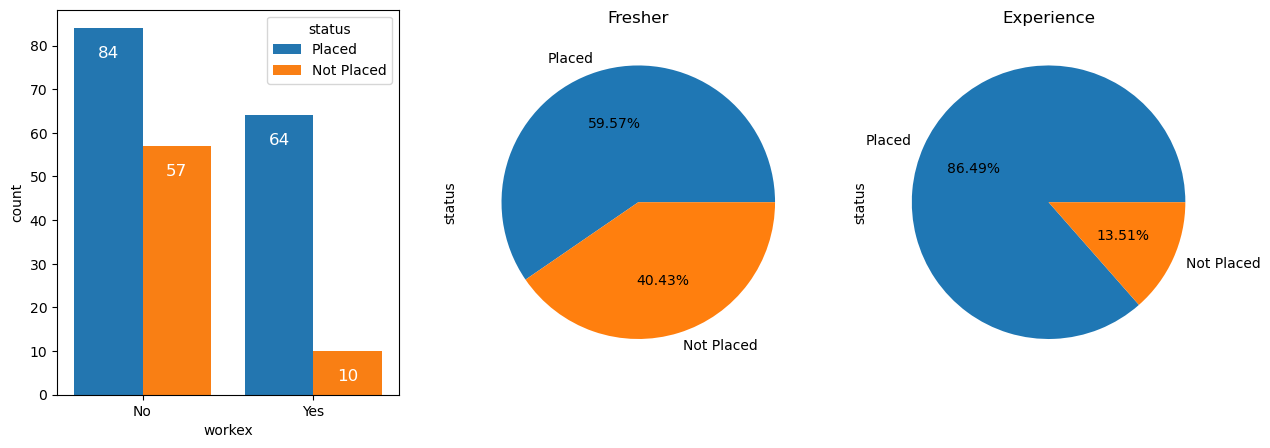

In [32]:
w=df.workex.value_counts()
print(w)

plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
ax=sns.countplot(x="workex", hue="status", data=df,saturation=0.95)

for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='white', size=12)


plt.subplot(1,3,2)
df.query('workex == "No"')['status'].value_counts().plot(kind = 'pie', autopct = '%.2f%%', title = 'Fresher')

plt.subplot(1,3,3)
df.query('workex == "Yes"')['status'].value_counts().plot(kind = 'pie', autopct = '%.2f%%', title = 'Experience')


plt.show()

#### Insights
- Here, 141 students does not have experience and 74 students have experience.
- Who have experience get more placed as compare to freshers.
- This feature affect status.

## 10. etest

#### Does etest affect status?

C:\Users\dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


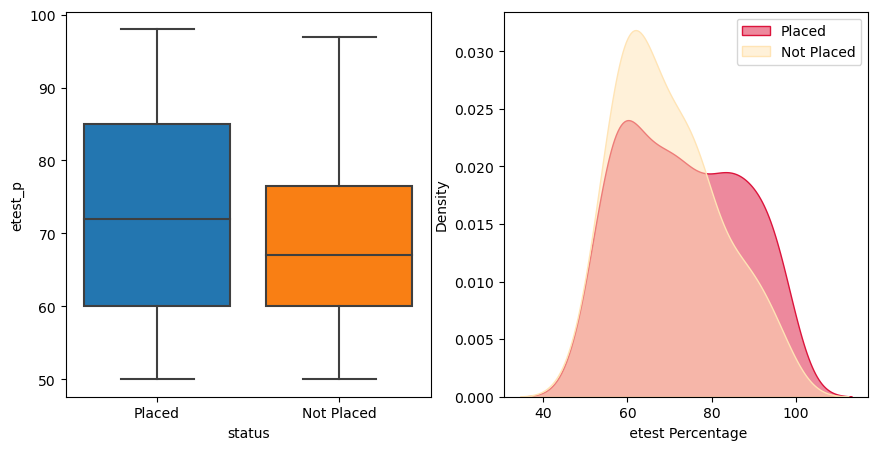

In [33]:
plt.figure(figsize=(16,5))

plt.subplot(1,3,1)
sns.boxplot("status","etest_p",data=df,saturation=0.95)

plt.subplot(1,3,2)
sns.kdeplot(df.etest_p[ df.status=="Placed"],shade=True,color='crimson',alpha=0.5)
sns.kdeplot(df.etest_p[ df.status=="Not Placed"],shade=True,color='moccasin',alpha=0.5)
plt.legend(["Placed", "Not Placed"])
plt.xlabel(" etest Percentage")
plt.show()

#### Insights
- The graph are overlapping with each other.
- The students who have 80% and above are getting placed.
- The students who have 60% to less than 80% are not getting placed.
- This feature not affect muct to status.

## 11. specialisation

#### Does specialisation affect status?

Mkt&Fin    120
Mkt&HR      95
Name: specialisation, dtype: int64


<function matplotlib.pyplot.show(close=None, block=None)>

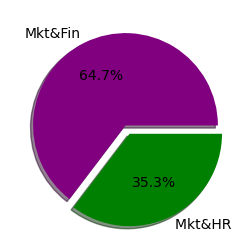

In [26]:
plt.figure(figsize=(6,3))

a=df.specialisation.value_counts()
print(a)

plt.pie(x=df['gender'].value_counts(),labels=['Mkt&Fin','Mkt&HR '],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['purple','green'])
plt.show

Mkt&Fin    120
Mkt&HR      95
Name: specialisation, dtype: int64


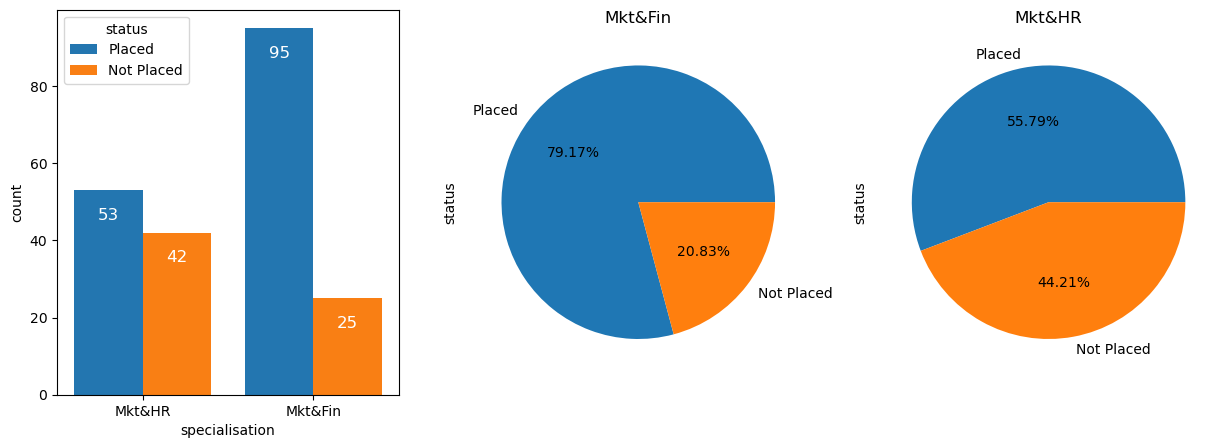

In [34]:
s=df.specialisation.value_counts()
print(s)

plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
ax=sns.countplot(x="specialisation", hue="status", data=df,saturation=0.95)

for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='white', size=12)


plt.subplot(1,3,2)
df.query('specialisation == "Mkt&Fin"')['status'].value_counts().plot(kind = 'pie', autopct = '%.2f%%', title = 'Mkt&Fin')

plt.subplot(1,3,3)
df.query('specialisation == "Mkt&HR"')['status'].value_counts().plot(kind = 'pie', autopct = '%.2f%%', title = 'Mkt&HR')


plt.show()

#### Insights
- Here, 120 Mkt&Fin students and 95 Mkt&HR students.
- Mkt&Fin students are more place than Mkt&HR students.
- This feature affect the status.

## 12. mba_p

##### Does mba_p affects the status?

C:\Users\dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


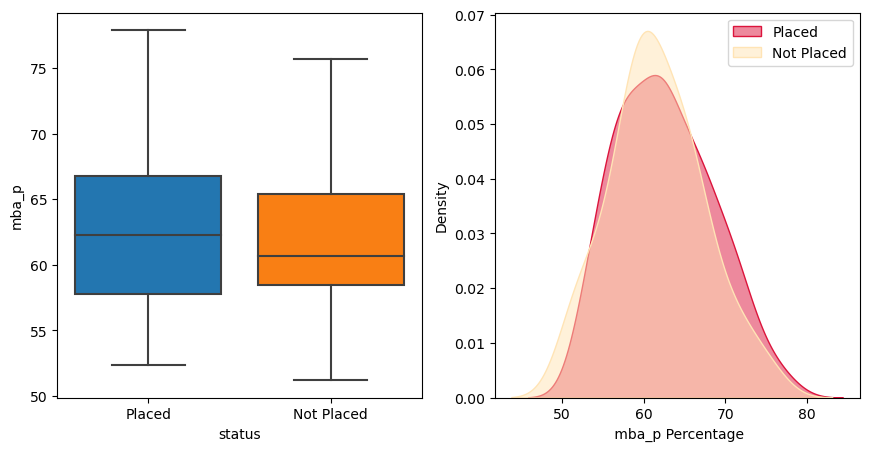

In [35]:
plt.figure(figsize=(16,5))

plt.subplot(1,3,1)
sns.boxplot("status","mba_p",data=df,saturation=0.95)

plt.subplot(1,3,2)
sns.kdeplot(df.mba_p[ df.status=="Placed"],shade=True,color='crimson',alpha=0.5)
sns.kdeplot(df.mba_p[ df.status=="Not Placed"],shade=True,color='moccasin',alpha=0.5)
plt.legend(["Placed", "Not Placed"])
plt.xlabel(" mba_p Percentage")
plt.show()

#### Insights
- The graph each overlapping with each other.
- This feature does not affect status.

## Correlation

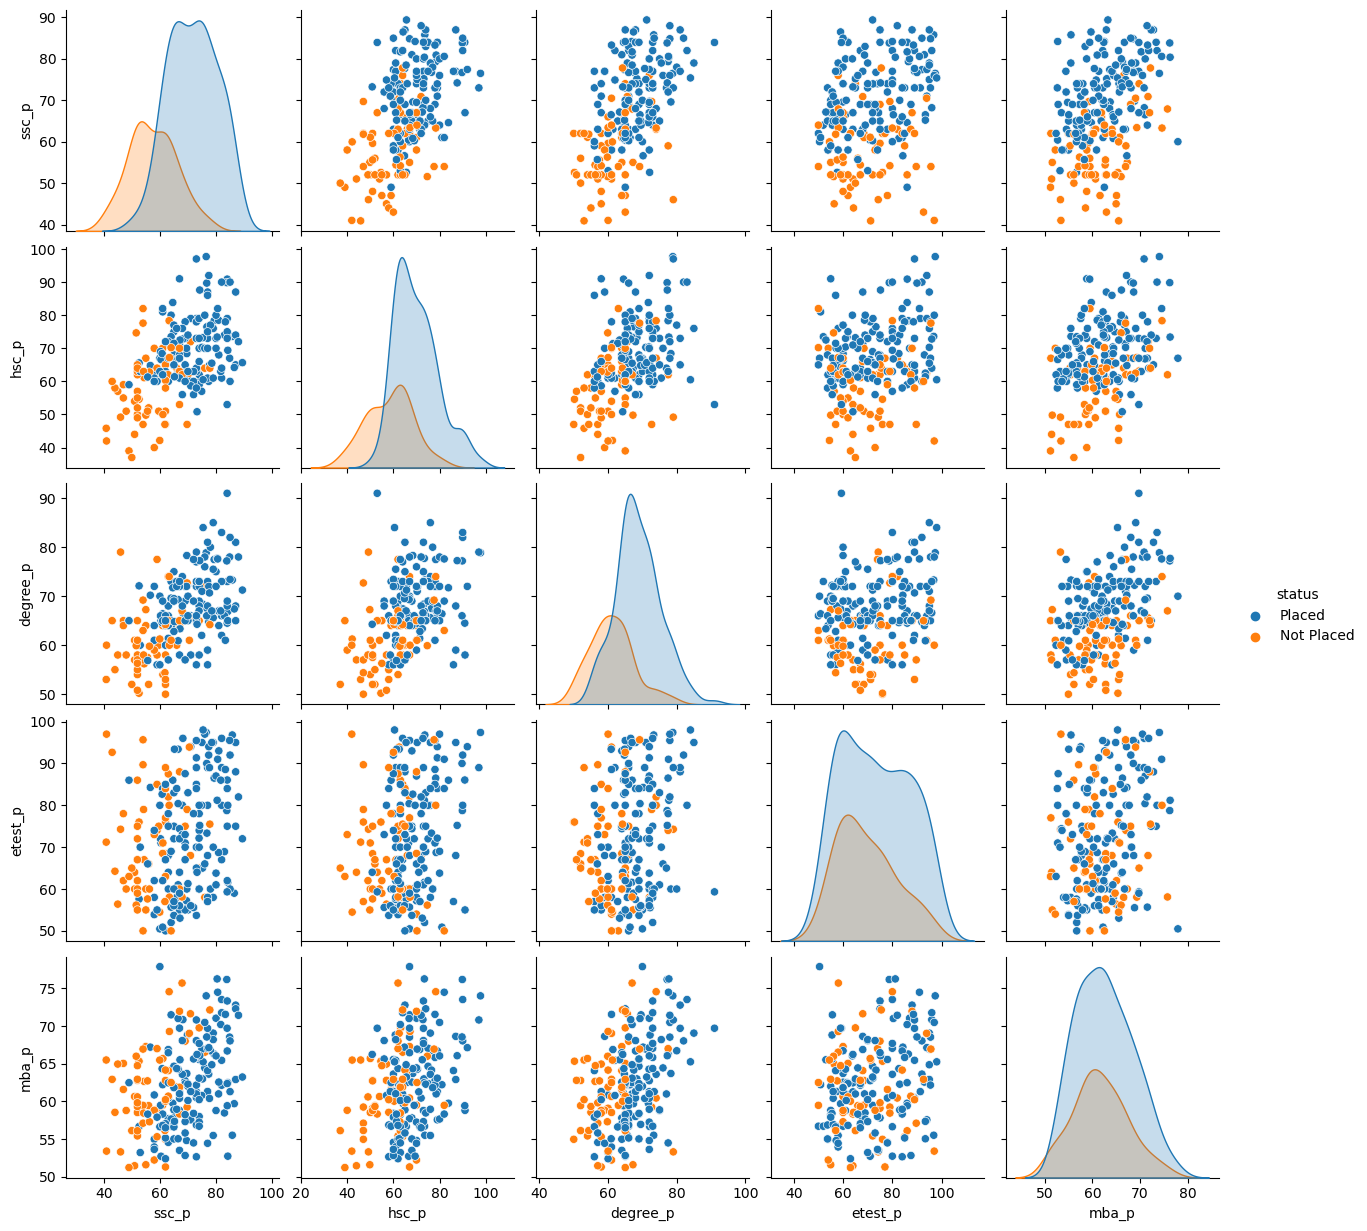

In [23]:
sns.pairplot(df, hue = 'status')
plt.show()

#### Insights

- From the above plot we cannot say that all percentage increases linearly with each other.

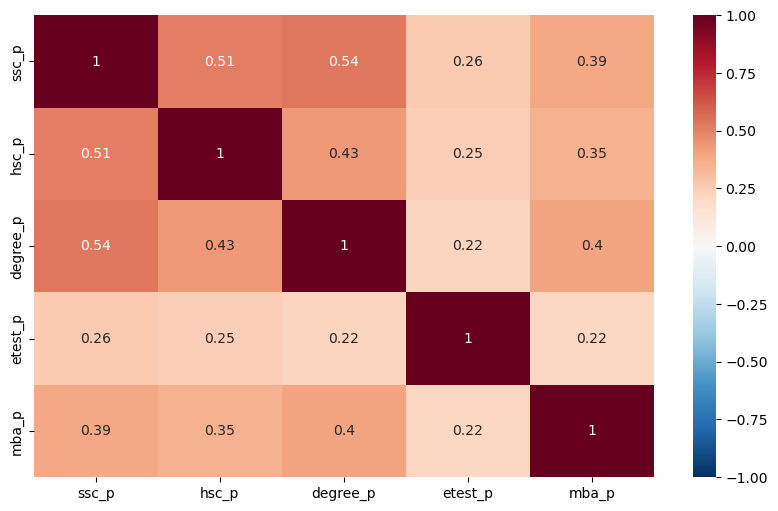

In [24]:
plt.figure(figsize = (10,6))
sns.heatmap(df.corr(), vmin = -1.0, vmax = 1.0, center = 0, cmap ='RdBu_r', annot = True)
plt.show()

## Conclusion

#### The affecting features are gender, ssc_p, hsc_p, hsc_s, degree_p, Work experience, entrance test, specialisation.